# Predicting Employment of Students at an University Campus 
## Phase 2: Predictive Modeling
### Group 46
### Zhaojin Liu s3206722, Martin Thu s3494324, Klara Vickov s3873315

## Table of Contents
- [Introduction](#intro)
    - [Phase 1 Summary](#sum)
    - [Report Overview](#ro)
    - [Overview of Methodology](#om)
- [Predictive Modeling](#model)
    - [One-Hot Encoding and Scaling](#ohe)
    - [Feature Selection](#fs)
    - [Logistic Regression](#lr)
    - [K Nearest Neighbors](#knn)
    - [Decision Tree](#dt)
    - [Random Forest](#rf)
    - [Naive Bayes](#nb)
    - [Model Comparison](#mc)
- [Critique and Limitations](#cl)
- [Summary and Conclusions](#sc)
    - [Project Summary](#ps)
    - [Summary of Findings](#sf)
    - [Conclusions](#con)
- [References](#ref)

## Introduction <a id='intro'></a>

### Phase 1 Summary <a id='sum'></a>
During phase 1 of the project, we pre-processed, explored, and visualized our chosen dataset that looks at academic information of students at Jain University in India and determines whether they received placement after university or not. 

The pre-processing involved checking for missing/incorrect values, outliers, changing feature names, and dropping ID-like columns. Then, we separated our target feature, status, from the descriptive features.

For exploring and visualizing, we looked at various one-variable, two-variable, and three-variable graphs and plots to determine what kind of relationships exist between features. Some interesting takeaways from our explorations were that male students have a higher chance of received placement, students with higher undergraduate and postgraduate GPAs are more likely to be placed, and a higher employability test percentage leads to higher chances of getting placed. A literature review backed up some of this data by showing that GPA, gender, and previous work experience contribute to higher employability for graduates.

We will load the dataset that was used in phase 1 of the project.

In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) 

In [6]:
placement = pd.read_csv("placement_phase2.csv", sep = "\t", index_col = [0])
placement.head().style.set_precision(3)

,Gender,Secondary Education Percentage,Secondary Board of Education,Higher Secondary Education Percentage,Higher Secondary Board of Education,Higher Secondary Specialisation,Undergraduate Degree Percentage,Undergraduate Degree Type,Work Experience,Employability Test Percentage,Post Graduate Specialisation,MBA Grade Percentage,Status
1,M,67.000,Others,91.000,Others,Commerce,58.000,Sci&Tech,No,55.000,Mkt&HR,58.800,Placed
2,M,79.330,Central,78.330,Others,Science,77.480,Sci&Tech,Yes,86.500,Mkt&Fin,66.280,Placed
3,M,65.000,Central,68.000,Central,Arts,64.000,Comm&Mgmt,No,75.000,Mkt&Fin,57.800,Placed
4,M,56.000,Central,52.000,Central,Science,52.000,Sci&Tech,No,66.000,Mkt&HR,59.430,Not Placed
5,M,85.800,Central,73.600,Central,Commerce,73.300,Comm&Mgmt,No,96.800,Mkt&Fin,55.500,Placed


### Report Overview <a id='ro'></a>
For phase 2, we will begin by encoding categorical features, including the target feature, and scaling the necessary descriptive features. Then we will use feature selection to select the best descriptive features of the dataset. Next, we will fit K-Nearest Neighbors, Decision Tree, Random Forest, Linear Regression, and Naive Bayes models to our data, and compare the models to see which one is of best fit. Then we will critique our results before summarizing the whole project and drawing relevant conclusions.

### Overview of Methodology <a id='om'></a>

## Predictive Modeling <a id='model'></a>

### One-Hot Encoding and Scaling <a id='ohe'></a>
Before doing any modeling or feature selection, we must encoded all categorical features into numerical features so they can be modeled.

First, we will separate the target feature, status, from the rest of the descriptive features.

In [7]:
Data = placement.drop(columns='Status')
target = placement['Status']

We will encode the target feature first. Those that are placed will be encoded as 1 and those that are not placed will be encoded as 0. One thing to keep in mind here is that the two target classes are not balanced, with twice as many placed ('1') values as not placed ('0') values.

In [8]:
target = pd.get_dummies(target, drop_first = True)
target.value_counts()

Placed
1         148
0          67
dtype: int64

Next we will encode all the categorical features.

Here we print the levels of each categorical variable. Gender, Secondary Board of Education, Higher Secondary Board of Education, Work Experience, Post Graduate Specialisation are two-level variables and will be encoded as 1 or 0 in one variable. On the other hand, Higher Secondary Specialisation and Undergraduate Degree Type are three-level variables and will be encoded into three separate variables.

In [9]:
for col in Data.columns[Data.dtypes==object]:
    print(col)
    print(Data[col].value_counts(), "\n")

Gender
M    139
F     76
Name: Gender, dtype: int64 

Secondary Board of Education
Central    116
Others      99
Name: Secondary Board of Education, dtype: int64 

Higher Secondary Board of Education
Others     131
Central     84
Name: Higher Secondary Board of Education, dtype: int64 

Higher Secondary Specialisation
Commerce    113
Science      91
Arts         11
Name: Higher Secondary Specialisation, dtype: int64 

Undergraduate Degree Type
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: Undergraduate Degree Type, dtype: int64 

Work Experience
No     141
Yes     74
Name: Work Experience, dtype: int64 

Post Graduate Specialisation
Mkt&Fin    120
Mkt&HR      95
Name: Post Graduate Specialisation, dtype: int64 



In [10]:
cat_cols = Data.columns[Data.dtypes==object].to_list()

In [11]:
for col in cat_cols:
    if (Data[col].nunique() == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)

Data = pd.get_dummies(Data)

Below we can see that all the value have been properly encoded into 1 and 0. For Gender, Male is 1 and Female is 0. For Secondary Board of Education, Central is 1 and Others is 0. For Higher Secondary Board of Education, Others is 1 and Central is 0. For Work Experience, Yes is 1 and No is 0. For Post Graduate Specialisation, Mkt&Fin is 1 and Mkt&HR is 0.

In [12]:
for col in Data.columns:
    if Data[col].nunique() == 2 or Data[col].nunique() == 3:
        print(col)
        print(Data[col].value_counts(), "\n")

Gender
1    139
0     76
Name: Gender, dtype: int64 

Secondary Board of Education
0    116
1     99
Name: Secondary Board of Education, dtype: int64 

Higher Secondary Board of Education
1    131
0     84
Name: Higher Secondary Board of Education, dtype: int64 

Work Experience
0    141
1     74
Name: Work Experience, dtype: int64 

Post Graduate Specialisation
0    120
1     95
Name: Post Graduate Specialisation, dtype: int64 

Higher Secondary Specialisation_Arts
0    204
1     11
Name: Higher Secondary Specialisation_Arts, dtype: int64 

Higher Secondary Specialisation_Commerce
1    113
0    102
Name: Higher Secondary Specialisation_Commerce, dtype: int64 

Higher Secondary Specialisation_Science
0    124
1     91
Name: Higher Secondary Specialisation_Science, dtype: int64 

Undergraduate Degree Type_Comm&Mgmt
1    145
0     70
Name: Undergraduate Degree Type_Comm&Mgmt, dtype: int64 

Undergraduate Degree Type_Others
0    204
1     11
Name: Undergraduate Degree Type_Others, dtype: 

In [13]:
# Delete later
Data.sample(5, random_state=999).style.set_precision(3)

,Gender,Secondary Education Percentage,Secondary Board of Education,Higher Secondary Education Percentage,Higher Secondary Board of Education,Undergraduate Degree Percentage,Work Experience,Employability Test Percentage,Post Graduate Specialisation,MBA Grade Percentage,Higher Secondary Specialisation_Arts,Higher Secondary Specialisation_Commerce,Higher Secondary Specialisation_Science,Undergraduate Degree Type_Comm&Mgmt,Undergraduate Degree Type_Others,Undergraduate Degree Type_Sci&Tech
149,0,77.000,0,86.000,0,56.000,0,57.000,0,64.080,1,0,0,0,1,0
192,1,67.000,1,61.000,0,72.000,0,72.000,0,61.010,0,0,1,1,0,0
126,0,84.000,0,73.000,0,73.000,0,75.000,0,73.330,0,1,0,1,0,0
69,0,69.700,0,47.000,0,72.700,0,79.000,1,59.240,0,1,0,0,0,1
188,1,78.500,0,65.500,0,67.000,1,95.000,0,64.860,0,0,1,0,0,1


Now that the data is encoded, we will scale the descriptive features, so they are within the range of 0 to 1 to ensure equal weighting. We will store the column names as they will be needed to build up the new data frame with scaled features. Scaling will produce a NumPy array which does not include column names.

In [14]:
col_names = Data.columns

In [15]:
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler()
Data_scaled = data_scaler.fit_transform(Data)

We put the dataset back together using the NumPy array and the previously stored column names. We can see below that the features previously labeled 1 and 0 have stayed that way, and all other features now have values between 1 and 0.

In [16]:
Data_scaled = pd.DataFrame(Data_scaled, columns = col_names)
Data_scaled.sample(5, random_state = 999).style.set_precision(3)

,Gender,Secondary Education Percentage,Secondary Board of Education,Higher Secondary Education Percentage,Higher Secondary Board of Education,Undergraduate Degree Percentage,Work Experience,Employability Test Percentage,Post Graduate Specialisation,MBA Grade Percentage,Higher Secondary Specialisation_Arts,Higher Secondary Specialisation_Commerce,Higher Secondary Specialisation_Science,Undergraduate Degree Type_Comm&Mgmt,Undergraduate Degree Type_Others,Undergraduate Degree Type_Sci&Tech
148,0.000,0.744,0.000,0.807,0.000,0.146,0.000,0.146,0.000,0.482,1.000,0.000,0.000,0.000,1.000,0.000
191,1.000,0.538,1.000,0.395,0.000,0.537,0.000,0.458,0.000,0.367,0.000,0.000,1.000,1.000,0.000,0.000
125,0.000,0.889,0.000,0.593,0.000,0.561,0.000,0.521,0.000,0.829,0.000,1.000,0.000,1.000,0.000,0.000
68,0.000,0.594,0.000,0.165,0.000,0.554,0.000,0.604,1.000,0.301,0.000,1.000,0.000,0.000,0.000,1.000
187,1.000,0.775,0.000,0.470,0.000,0.415,1.000,0.938,0.000,0.512,0.000,0.000,1.000,0.000,0.000,1.000


To be certain that scaling has been done properly, we print out a summary of all columns. The min value is 0 and max value is 1 for each column, so scaling has been successful. 

In [17]:
Data_scaled.describe().style.set_precision(3)

,Gender,Secondary Education Percentage,Secondary Board of Education,Higher Secondary Education Percentage,Higher Secondary Board of Education,Undergraduate Degree Percentage,Work Experience,Employability Test Percentage,Post Graduate Specialisation,MBA Grade Percentage,Higher Secondary Specialisation_Arts,Higher Secondary Specialisation_Commerce,Higher Secondary Specialisation_Science,Undergraduate Degree Type_Comm&Mgmt,Undergraduate Degree Type_Others,Undergraduate Degree Type_Sci&Tech
count,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000
mean,0.647,0.544,0.460,0.483,0.609,0.399,0.344,0.460,0.442,0.415,0.051,0.526,0.423,0.674,0.051,0.274
std,0.479,0.223,0.500,0.180,0.489,0.179,0.476,0.277,0.498,0.219,0.221,0.501,0.495,0.470,0.221,0.447
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.406,0.000,0.394,0.000,0.268,0.000,0.208,0.000,0.252,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,0.538,0.000,0.461,1.000,0.390,0.000,0.438,0.000,0.404,0.000,1.000,0.000,1.000,0.000,0.000
75%,1.000,0.718,1.000,0.593,1.000,0.537,1.000,0.698,1.000,0.564,0.000,1.000,1.000,1.000,0.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### Feature Selection <a id='fs'></a>

#### KNN Model

For feature selection of the KNN model, we will use the f-score method to compare each descriptive feature with the target feature using F-distribution. 

First, we will assess the performance of the full set of features using repeat stratified k-folds with 3 repeats and accuracy as our scoring metric. K-folds is used as the dataset is quite small (212 variables) which is not enough for hold-out sampling.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn import feature_selection as fs

In [19]:
KNN_model = KNeighborsClassifier()
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                     random_state=999)

In [20]:
scoring_metric = 'accuracy'

In [21]:
cv_results_full = cross_val_score(estimator=KNN_model,
                             X=Data,
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)

In [22]:
cv_results_full

array([0.8372093 , 0.76744186, 0.81395349, 0.93023256, 0.86046512,
       0.81395349, 0.90697674, 0.8372093 , 0.8372093 , 0.81395349,
       0.88372093, 0.81395349, 0.88372093, 0.8372093 , 0.76744186])

In [23]:
cv_results_full.mean().round(3)

0.84

This gives 84% accuracy using the full set of features, which is the number of correct predictions divided by the full set of predictions.

Next, we will select various numbers of features and determine if they give a higher accuracy than using all features.

In [24]:
num_features = 5

In [25]:
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data_scaled, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]

Starting with 5 features, the most important feature is Secondary Education Percentage. The first three features have a much higher importance (over 60%) than the other 2 features. This may indicate that having just 3 features selected is adequate for modeling.

In [26]:
best_features_fscore = Data_scaled.columns[fs_indices_fscore].values
best_features_fscore

array(['Secondary Education Percentage',
       'Higher Secondary Education Percentage',
       'Undergraduate Degree Percentage', 'Work Experience',
       'Post Graduate Specialisation'], dtype=object)

In [27]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([124.84250634,  67.74518757,  63.71917614,  17.57165962,
        14.27951129])

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

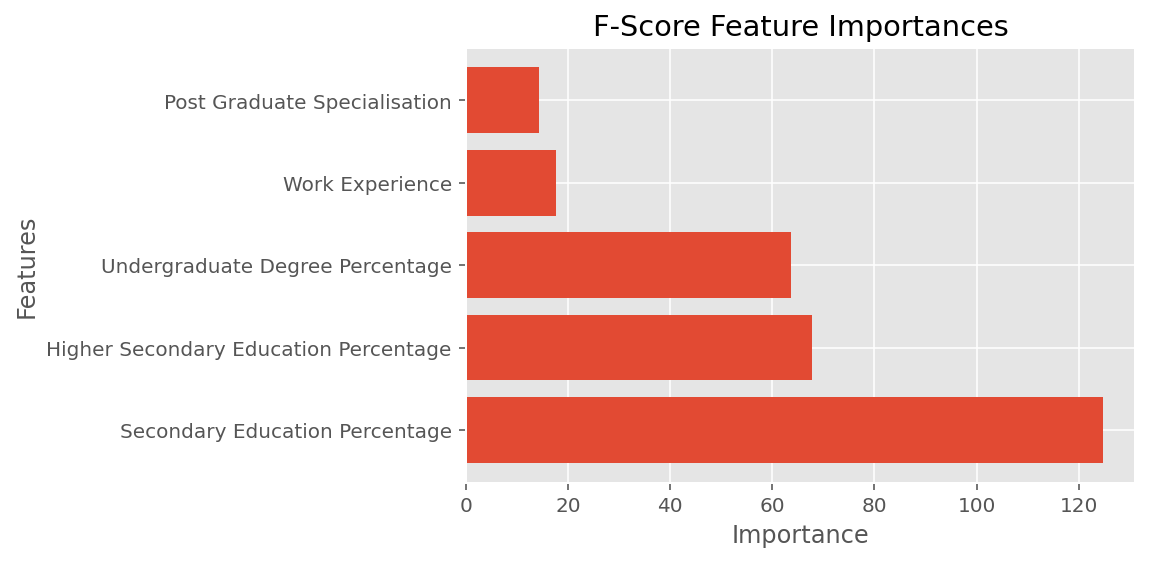

In [29]:
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')

The data is transformed from a pandas data frame to a numpy array as accuracy cross-validation only works on a numpy array.

In [30]:
D1= pd.DataFrame(Data_scaled).to_numpy()
type(D1)

numpy.ndarray

In [31]:
D1[:, fs_indices_fscore].shape

(215, 5)

Five selected features gives 84.5% accuracy.

In [32]:
cv_results_fscore = cross_val_score(estimator=KNN_model,
                             X=D1[:, fs_indices_fscore],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_fscore.mean().round(3)

0.845

We try feature selection again, this time with only 3 features. 

In [33]:
num_features = 3

In [34]:
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data_scaled, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]

In [35]:
best_features_fscore = Data_scaled.columns[fs_indices_fscore].values
best_features_fscore

array(['Secondary Education Percentage',
       'Higher Secondary Education Percentage',
       'Undergraduate Degree Percentage'], dtype=object)

In [36]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([124.84250634,  67.74518757,  63.71917614])

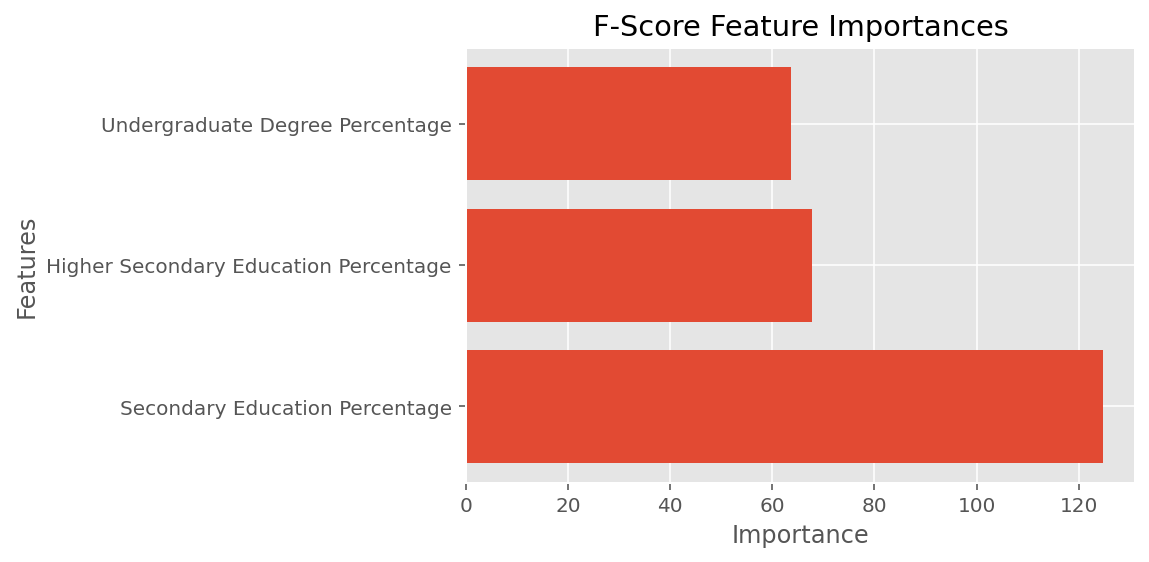

In [37]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
    
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')

This results in an accuracy of 85.3%, which is slightly higher than both full feature selection and 5 feature selection. 4 feature selection gives 84% accuracy, 6 feature selection gives 80.8% accuracy and 7 feature selection gives 79.8% accuracy. These are not shown for conciseness. So, for the KNN model, we will be using only 3 features: Secondary Education Percentage, Higher Secondary Education Percentage, and Undergraduate Degree Percentage.

In [38]:
cv_results_fscore = cross_val_score(estimator=KNN_model,
                             X=D1[:, fs_indices_fscore],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_fscore.mean().round(3)

0.853

### Logistic Regression <a id='lr'></a>

### K Nearest Neighbors <a id='knn'></a>


From feature selection, 3 features, Secondary Education Percentage, Higher Secondary Education Percentage, and Undergraduate Degree Percentage, were chosen as the most important features and they will be used in the KNN model below. First, we create a new data frame, Data_fs, that consists of just the three columns mentioned above.

In [35]:
Data_fs = Data_scaled[['Secondary Education Percentage', 'Higher Secondary Education Percentage', 'Undergraduate Degree Percentage']]

Then we set the train test split for the model with 70% for testing and 30% for training. Stratify parameter is set to target as the target class is unbalanced, with twice as many 1 values as 0 values. By having it stratified, the proportion of 1s and 0s will stay the same even after the data is split into training and testing.

In [36]:
from sklearn.model_selection import train_test_split
D_train, D_test, t_train, t_test = train_test_split(Data_fs, target, test_size =0.3,
                                                   stratify=target, random_state=999)

There are two parameters we can adjust in the KNN classifier model, n_neighbors and p value. We will test out a wide range of n_neighbors (from 1 to 13) to determine which has the best performance. Worth noting is that only 10 neighbors were initially tested and the best performer was k=2. So, a few additional k values were added to be sure that we were capturing the most accurate model. Additionally, we will use both Manhattan distance (p=1) and Euclidean distance (p=2) as the p-values.

In [37]:
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
              'p': [1, 2]}

In [38]:
from sklearn.model_selection import GridSearchCV

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,
                      scoring='accuracy', 
                      return_train_score=True)

In [39]:
gs_KNN.fit(Data_fs, target);

Fitting 15 folds for each of 26 candidates, totalling 390 fits


The best parameters for the model are found to be k = 11 neighbors and p = 2 Euclidean distance. The accuracy of these two parameters is 85.7%.

In [40]:
gs_KNN.best_params_

{'n_neighbors': 11, 'p': 2}

In [41]:
gs_KNN.best_score_.round(3)

0.859

In [42]:
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN['metric'] = results_KNN['p'].replace([1,2], ["Manhattan", "Euclidean"])

The results of the hyper-parameter tuning are shown in the plot below. k = 11 has the highest accuracy for both Manhattan and Euclidean models and k = 2 has the lowest accuracy for both models.

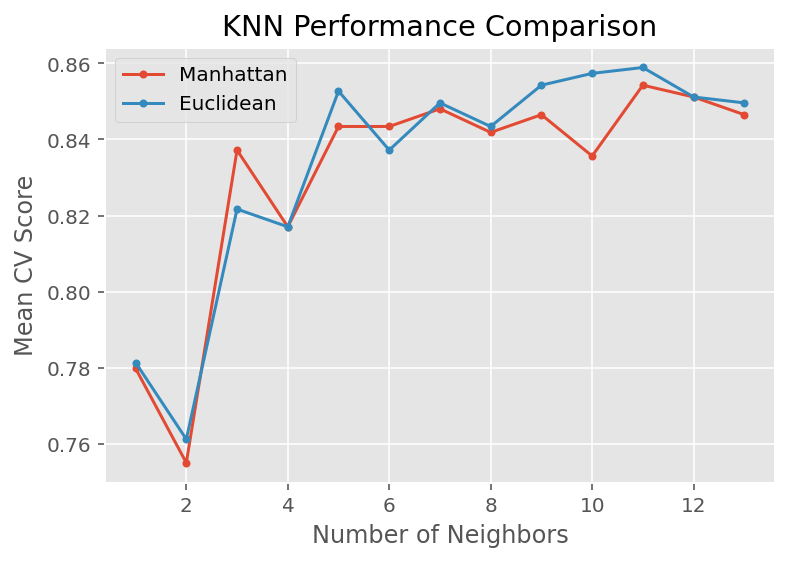

In [45]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

for i in ["Manhattan", "Euclidean"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

### Decision Tree <a id='dt'></a>

### Random Forest <a id='rf'></a>

### Naive Bayes <a id='nb'></a>

In [42]:
from spFSR import SpFSR
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
num_features = 5
sp_engine = SpFSR(x=D1, y=target, pred_type='c', wrapper=gnb, scoring='accuracy')
np.random.seed(999)


In [43]:
sp_output = sp_engine.run(num_features=num_features).results
fs_indices_spfsr = sp_output.get('selected_features')
fs_indices_spfsr


SpFSR-INFO: Wrapper: GaussianNB()
SpFSR-INFO: Hot start: True
SpFSR-INFO: Hot start range: 0.2
SpFSR-INFO: Feature weighting: False
SpFSR-INFO: Scoring metric: accuracy
SpFSR-INFO: Number of jobs: 1
SpFSR-INFO: Number of observations in the dataset: 215
SpFSR-INFO: Number of observations used: 215
SpFSR-INFO: Number of features available: 16
SpFSR-INFO: Number of features to select: 5
SpFSR-INFO: iter_no: 0, num_ft: 5, value: 0.819, st_dev: 0.039, best: 0.819 @ iter_no 0
SpFSR-INFO: iter_no: 10, num_ft: 5, value: 0.828, st_dev: 0.04, best: 0.843 @ iter_no 6
SpFSR-INFO: ===> iter_no: 10, same feature stall limit reached, initializing search...
SpFSR-INFO: iter_no: 20, num_ft: 5, value: 0.845, st_dev: 0.051, best: 0.845 @ iter_no 12
SpFSR-INFO: ===> iter_no: 25, same feature stall limit reached, initializing search...
SpFSR-INFO: iter_no: 30, num_ft: 5, value: 0.817, st_dev: 0.05, best: 0.845 @ iter_no 12
SpFSR-INFO: ===> iter_no: 35, same feature stall limit reached, initializing search

[1, 5, 0, 3, 2]

In [44]:
fs_indices_spfsr = sp_output.get('selected_features')
fs_indices_spfsr


[1, 5, 0, 3, 2]

In [46]:
best_features_spfsr = placement.columns[fs_indices_spfsr]
best_features_spfsr


Index(['Secondary Education Percentage', 'Higher Secondary Specialisation',
       'Gender', 'Higher Secondary Education Percentage',
       'Secondary Board of Education'],
      dtype='object')

In [47]:
feature_importances_spfsr = sp_output.get('selected_ft_importance')
feature_importances_spfsr


array([ 2.02987257e-01,  8.54909397e-02,  7.17493013e-02,  3.09701732e-02,
       -2.00105609e-04])

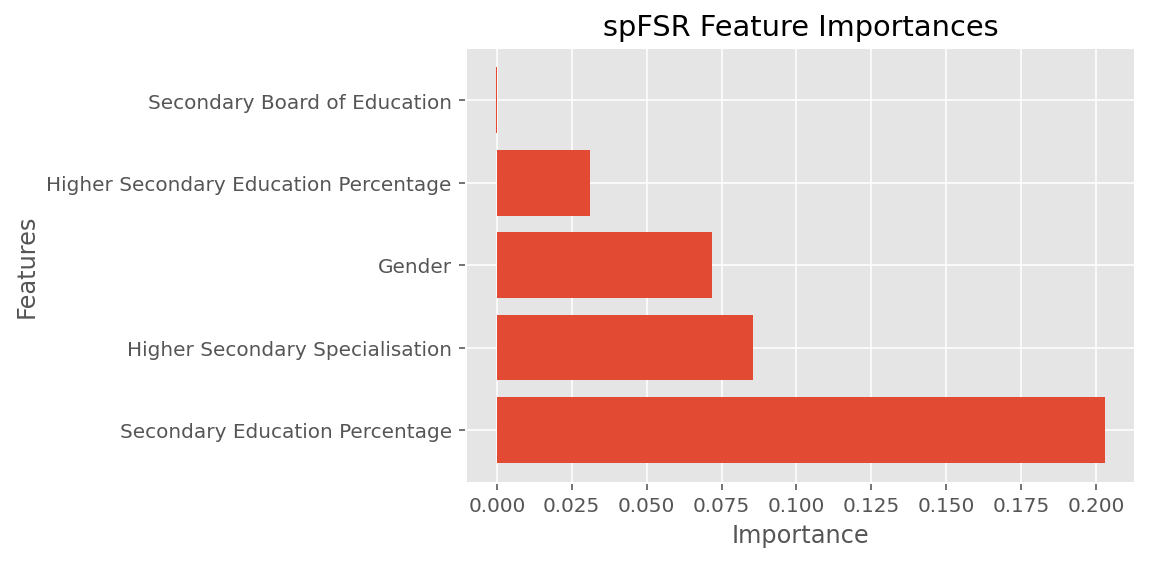

In [48]:
plot_imp(best_features_spfsr, feature_importances_spfsr, 'spFSR')


In [49]:
cv_results_spfsr = cross_val_score(estimator=gnb,
                             X=D1[:, fs_indices_spfsr],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_spfsr.mean().round(3)

0.856

In [52]:
print('Full Set of Features:', cv_results_full.mean().round(3))
print('F-Score:', cv_results_fscore.mean().round(3))
print('spFSR:', cv_results_spfsr.mean().round(3)) 

Full Set of Features: 0.84
F-Score: 0.853
spFSR: 0.856


In [53]:
Data_fs = Data_scaled[['Secondary Education Percentage', 'Higher Secondary Education Percentage', 'Gender']]

In [55]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

np.random.seed(999)

sample_size = 1000
x_exponential = np.random.exponential(2, sample_size).reshape(-1, 1)
x_transformed = PowerTransformer().fit_transform(x_exponential)

df1 = pd.DataFrame(x_exponential)
df1['distribution'] = 'exponential'

df2 = pd.DataFrame(x_transformed)
df2['distribution'] = 'transformed'

# combine the two data frames into one to be used for plotting
df = pd.concat([df1, df2], axis=0)
df.rename(columns={0: 'x'}, inplace=True)

print(df.sample(n=10))

            x distribution
342 -0.276524  transformed
321  3.216755  exponential
247  1.297923  transformed
514 -1.678249  transformed
343  0.204341  exponential
386  0.486638  exponential
304  0.883091  exponential
772  0.015391  exponential
889  0.184597  transformed
554  0.076667  exponential


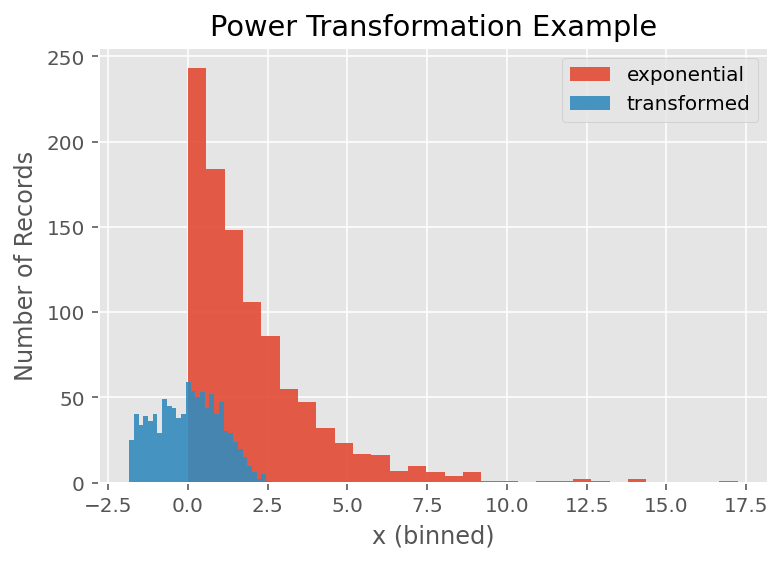

In [56]:
for i in ['exponential', 'transformed']:
    temp = df[df['distribution']==i]
    plt.hist(temp['x'], alpha = 0.9, bins =30, label = i)

plt.xlabel('x (binned)')
plt.ylabel('Number of Records')
plt.title('Power Transformation Example')
plt.legend()
plt.show()

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

np.random.seed(999)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(D1)

gs_NB.fit(Data_transformed, target);


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [74]:
gs_NB.best_params_


{'var_smoothing': 0.1}

In [75]:
gs_NB.best_score_


0.8263565891472867

In [72]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']


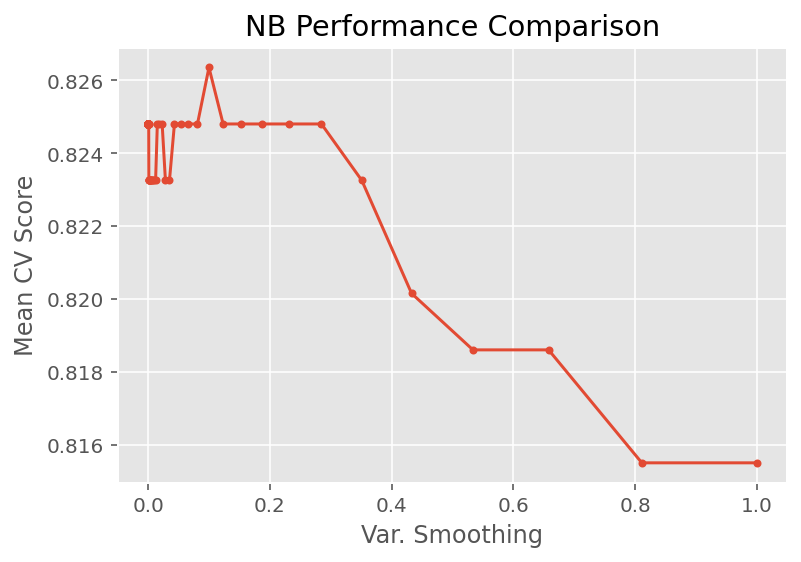

In [76]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

We observe that the best variance smoothing parameter for NB is around 0.1, though the difference between other values in terms of the mean CV score is very small per the range of the y-axis.

### Model Comparison <a id='mc'></a>

## Critique and Limitations <a id='cl'></a>

## Summary and Conclusions <a id='sc'></a>

### Project Summary <a id='ps'></a>

### Summary of Findings <a id='sf'></a>

### Conclusions <a id='con'></a>

## References <a id='ref'></a>